In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [ ]:
df.head(5)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.4480,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.4390,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday
2,2,2,ORD100379,2020-01-17,NaN,CUST10079,Divya Kulkarni,24,Female,Consumer,North,Punjab,Amritsar,PROD2195,Nilkamal Study Tables,Furniture,Study Tables,Nilkamal,25174.95,4,25,25174.95,75524.85,0.1664,12567.67,0.12,9062.98,0.00,Standard,84587.83,Net Banking,7,Processing,NaN,No,2020,1,Q1,Friday
3,3,3,ORD100031,2020-01-19,2020-01-23,CUST10152,Kavita Reddy,64,Female,Consumer,Central,Madhya Pradesh,Indore,PROD9901,Puma Jackets,Clothing,Jackets,Puma,2906.00,4,0,0.00,11624.01,0.3756,4366.35,0.12,1394.88,128.97,Standard,13147.86,UPI,4,Delivered,4.0,No,2020,1,Q1,Sunday
4,4,4,ORD100960,2020-01-26,2020-01-29,CUST10164,Rahul Verma,62,Male,Consumer,South,Telangana,Hyderabad,PROD4385,Hometown Curtains,Home Decor,Curtains,Hometown,8735.04,3,5,1310.26,24894.87,0.2495,6211.20,0.12,2987.38,142.58,Standard,28024.83,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Sunday


### 8. Show the total sales_amount and total profit_amount for each category.

In [24]:
df.groupby('category')[['sales_amount','profit_amount']].sum().sort_values(by='profit_amount',ascending=False)

,sales_amount,profit_amount
category,,
Furniture,13516030.89,2858410.06
Kitchen,2456439.34,471391.68
Home Decor,1726247.93,424239.41
Clothing,1096044.76,366038.58
Books,302536.49,114583.61
Electronics,484628.69,36595.52


### Which category has the highest profit margin, and how does it compare to the category with the highest total sales?

In [25]:
category_analysis=df.groupby('category')\
    .agg(
        total_sale=('sales_amount','sum'),
        total_profit=('profit_amount','sum')
        )\
        .reset_index()

category_analysis['profit_margin']=round((category_analysis['total_profit']/category_analysis['total_sale'])*100,2)

category_analysis.sort_values(by='profit_margin', ascending=False)

,category,total_sale,total_profit,profit_margin
0,Books,302536.49,114583.61,37.87
1,Clothing,1096044.76,366038.58,33.40
4,Home Decor,1726247.93,424239.41,24.58
3,Furniture,13516030.89,2858410.06,21.15
5,Kitchen,2456439.34,471391.68,19.19
2,Electronics,484628.69,36595.52,7.55


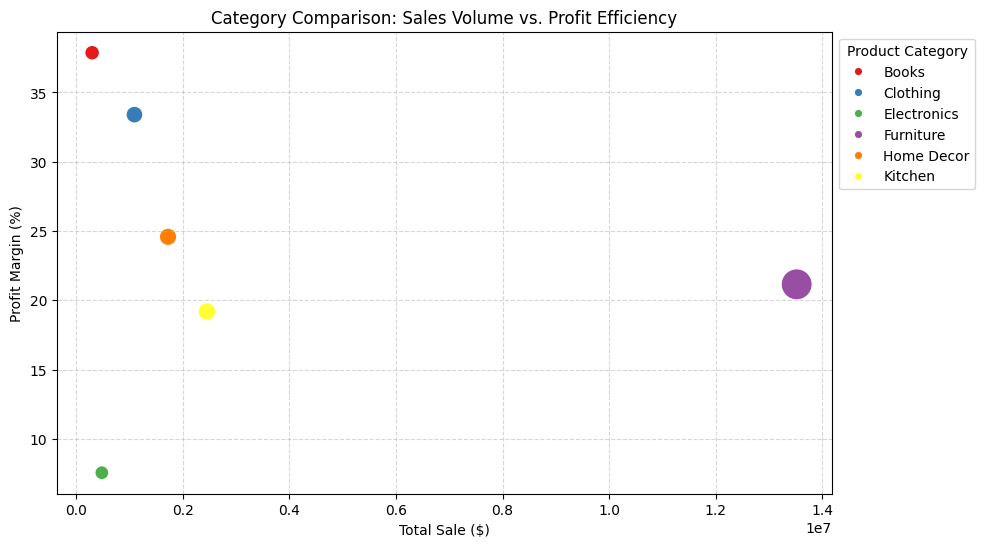

In [26]:
plt.figure(figsize=(10,6))

# 1. Create the plot as usual
ax = sns.scatterplot(
    data=category_analysis,
    x='total_sale', y='profit_margin',
    size='total_profit', sizes=(100,500),
    hue='category', palette='Set1'
)

# 2. Extract all handles and labels created by Seaborn
handles, labels = ax.get_legend_handles_labels()

# 3. Slice them: 
# index 0 is the title "category"
# indices 1 to 7 are your actual categories (if you have 6 categories)
num_categories = category_analysis['category'].nunique()

plt.legend(
    handles[1:num_categories+1], 
    labels[1:num_categories+1], 
    title='Product Category', 
    bbox_to_anchor=(1,1), 
    loc='upper left'
)

plt.xlabel('Total Sale ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Category Comparison: Sales Volume vs. Profit Efficiency')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### Visualization

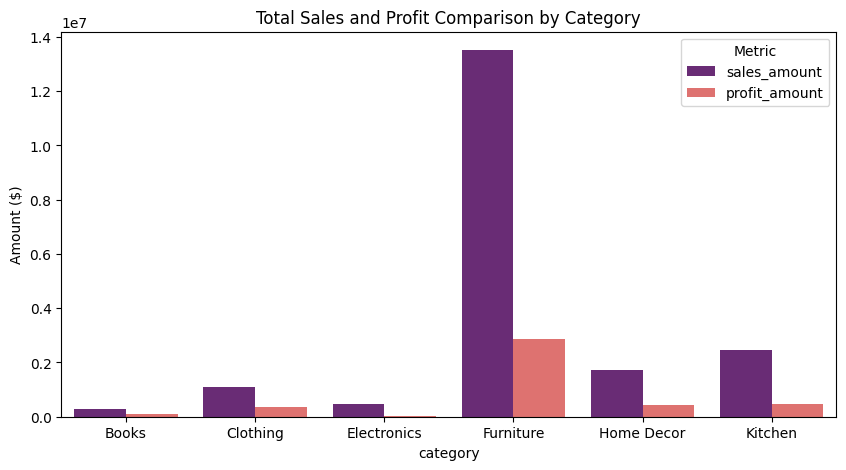

In [53]:
df_melted=df.groupby('category')[['sales_amount','profit_amount']].sum().reset_index()

df_melted=df_melted.melt(id_vars='category',var_name='Metric',value_name='Amount')

plt.figure(figsize=(10,5))

ax=sns.barplot(
    data=df_melted,
    x=df_melted.category,
    y=df_melted.Amount,
    hue=df_melted.Metric,
    palette='magma'
)

# ? for bar label
# for container in ax.containers:
#     ax.bar_label(container,padding=0.5)

plt.title('Total Sales and Profit Comparison by Category')
plt.ylabel('Amount ($)')

plt.show()